In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import matmul
from numpy.linalg import inv

In [15]:
# Generate random data by adding noise to a line
noise = 4
w = rand(2,1) # y = w[0] + w[1]*x
x = np.linspace(-5,5,20)
y = w[0] + w[1]*x + noise*rand(len(x))

The linear regression model can be written as:

$$
y = w_0 + w_1 x = \mathbf{w}^\top \mathbf{x}
$$

where  
- $\mathbf{w} = [w_0,\, w_1]^\top$ is the weight vector,  
- $\mathbf{x} = [1,\, x]^\top$ is the feature vector (using the bias trick, $x_0 = 1$ for the intercept).

Here are some example values for $\mathbf{X}$, $\mathbf{y}$, and $\mathbf{w}$:

- $\mathbf{X}$ (design matrix, with a column of ones for the intercept and a column for $x$ values):

$$
\mathbf{X} = \begin{bmatrix}
1 & -5.00 \\
1 & -4.47 \\
1 & -3.95 \\
\vdots & \vdots \\
1 & 5.00 \\
\end{bmatrix}
$$

- $\mathbf{y}$ (target values):

$$
\mathbf{y} = \begin{bmatrix}
-2.32 \\
-1.37 \\
-2.13 \\
\vdots \\
9.08 \\
\end{bmatrix}
$$

- $\mathbf{w}$ (weights):

$$
\mathbf{w} = \begin{bmatrix}
0.51 \\
0.92 \\
\end{bmatrix}
$$



In [ ]:
X = np.column_stack((np.ones(len(x)), x.reshape(-1,1))) # add a column of ones to X for the intercept (bias trick)

The `.reshape(-1, 1)` method is used to convert a 1-dimensional numpy array into a 2-dimensional column vector.  
- `-1` means "infer the number of rows automatically".
- `1` means "make it a single column".

For example, if `x` is shape `(20,)`, then `x.reshape(-1, 1)` becomes shape `(20, 1)`.  
This is often needed when stacking arrays as columns (e.g., with `np.column_stack`) or for matrix operations that expect 2D arrays.

In [17]:
X

array([[ 1.        , -5.        ],
       [ 1.        , -4.47368421],
       [ 1.        , -3.94736842],
       [ 1.        , -3.42105263],
       [ 1.        , -2.89473684],
       [ 1.        , -2.36842105],
       [ 1.        , -1.84210526],
       [ 1.        , -1.31578947],
       [ 1.        , -0.78947368],
       [ 1.        , -0.26315789],
       [ 1.        ,  0.26315789],
       [ 1.        ,  0.78947368],
       [ 1.        ,  1.31578947],
       [ 1.        ,  1.84210526],
       [ 1.        ,  2.36842105],
       [ 1.        ,  2.89473684],
       [ 1.        ,  3.42105263],
       [ 1.        ,  3.94736842],
       [ 1.        ,  4.47368421],
       [ 1.        ,  5.        ]])

The normal equation for linear regression is:

$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

where  
- $\mathbf{X}$ is the matrix of input features,  
- $\mathbf{y}$ is the vector of target values,  
- $\mathbf{w}$ is the vector of weights (parameters).

In [ ]:
# Calculate the weights using the Normal Equation
w_est = matmul(inv(matmul(X.T, X)), X.T).dot(y)
y_est = X.dot(w_est) # y_est = w_est[0] + w_est[1]*x

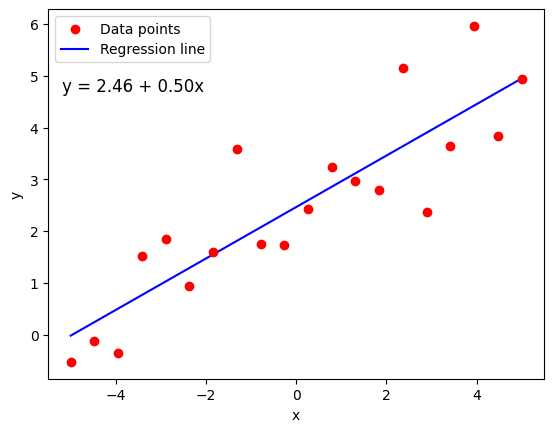

In [81]:
# Visualise the results
plt.scatter(x,y, color="red", label="Data points") 
plt.plot(x, y_est, color="blue", label="Regression line", zorder=0)
plt.legend()

# Show the equation of the line
plt.text(-5.2, 4.7, f"y = {w_est[0]:.2f} + {w_est[1]:.2f}x", fontsize=12, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Polynomial Regression

Polynomial regression extends linear regression to fit non-linear relationships by using polynomial features. For a quadratic model, the equation is:

$$
y = w_0 + w_1 x + w_2 x^2 
$$

This can also be written in matrix form as:

$$
\mathbf{y} = \mathbf{X} \mathbf{w}
$$

where $\mathbf{w} = [w_0, w_1, w_2]^T$ and each row of $\mathbf{X}$ is $[1, x_i, x_i^2]$.

The design matrix $\mathbf{X}$ for polynomial regression includes:
- A column of ones for the intercept
- The original $x$ values for the linear term
- The squared $x$ values ($x^2$) for the quadratic term

Now we'll show specific examples of our polynomial regression variables to illustrate the structure:

**Example values for polynomial regression:**

For our quadratic model $y = w_0 + w_1 x + w_2 x^2$, here are some example values:

**Input values (x):**
$$x = [-5.00, -4.47, -3.95, \ldots, 4.47, 5.00]$$

**Design matrix (X)** with columns for intercept, linear term, and quadratic term:
$$\mathbf{X} = \begin{bmatrix}
1 & -5.00 & 25.00 \\
1 & -4.47 & 20.01 \\
1 & -3.95 & 15.58 \\
\vdots & \vdots & \vdots \\
1 & 4.47 & 20.01 \\
1 & 5.00 & 25.00
\end{bmatrix}$$

**Estimated weights (w_est):**
$$\mathbf{w} = \begin{bmatrix}
2.13 \\
1.24 \\
0.97
\end{bmatrix}$$

This means our fitted model is: $y = 2.13 + 1.24x + 0.97x^2$

**Target values (y):**
$$\mathbf{y} = \begin{bmatrix}
20.36 \\
16.27 \\
12.06 \\
\vdots \\
26.18 \\
31.64
\end{bmatrix}$$

**Predicted values (y_est):**
$$\hat{\mathbf{y}} = \begin{bmatrix}
20.08 \\
15.92 \\
12.29 \\
\vdots \\
26.99 \\
32.45
\end{bmatrix}$$

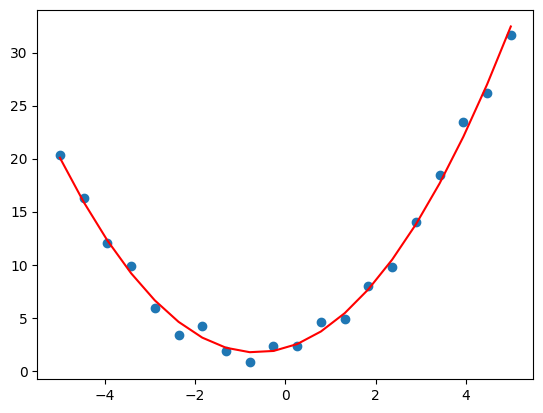

In [82]:
import numpy as np
from numpy import array
from numpy import matmul
from numpy.linalg import inv
from numpy.random import rand
from matplotlib import pyplot

# generate data on a line perturbed with some noise
noise_margin = 3
w = 2*rand(3,1)  # w[0] is random constant term (offset from origin), w[1] is random linear term, w[2] is random quadratic term
x = np.linspace(-5,5,20)
y = w[0] + w[1]*x + w[2]*x**2 + noise_margin*rand(len(x))

# create the design matrix: the x data, and add a column of ones for the constant term
X = np.column_stack( [np.ones([len(x), 1]), x.reshape(-1, 1), (x**2).reshape(-1, 1)] )

# These are the normal equations in matrix form: w = (X^T X)^-1 X^T y
w_est = matmul(inv(matmul(X.transpose(),X)),X.transpose()).dot(y)

# evaluate the x values in the fitted model to get estimated y values
y_est = w_est[0] + w_est[1]*x + w_est[2]*x**2

# visualize the fitted model
pyplot.scatter(x, y)
pyplot.plot(x, y_est, color='red')
pyplot.show()